###Data Cleaning

In [ ]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv(url, names=column_names, sep=",\s*", engine='python')

# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Convert income to a binary variable
data['income'] = (data['income'] == '>50K').astype(int)


###Visualization 1: Income Distribution by Education Level

User Story: As a member of the UVW marketing team, I want to analyze the relationship between educational attainment and income levels to determine how to effectively market our degree programs to potential students based on their educational background.

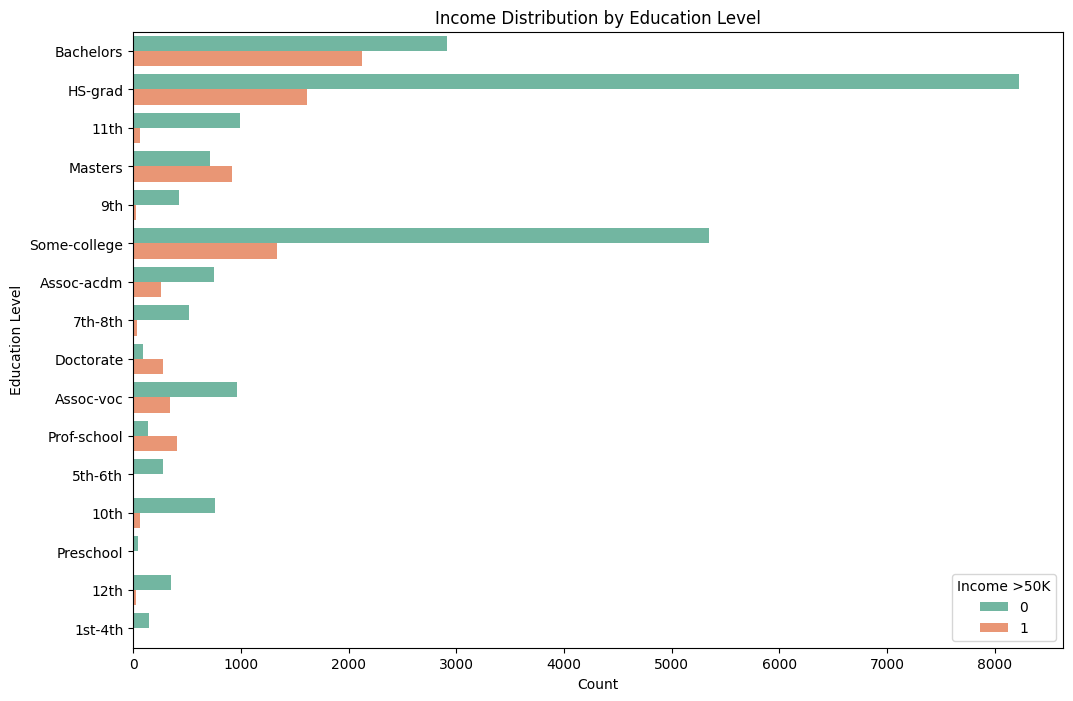

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of education level vs income
plt.figure(figsize=(12, 8))
sns.countplot(y='education', hue='income', data=data, palette='Set2')
plt.title('Income Distribution by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Income >50K')
plt.show()

Interpretation: This visualization demonstrates that higher levels of education often correlate with incomes exceeding $50,000. This insight is crucial for tailoring marketing strategies to emphasize the value of advanced education in achieving financial success, potentially appealing to those with lower educational attainments who aspire to increase their income through further education.

###Visualization 2: Income Distribution Across Races
User Story: The marketing director needs to understand how income distribution varies across different racial groups to ensure our marketing campaigns are inclusive and effectively targeted.

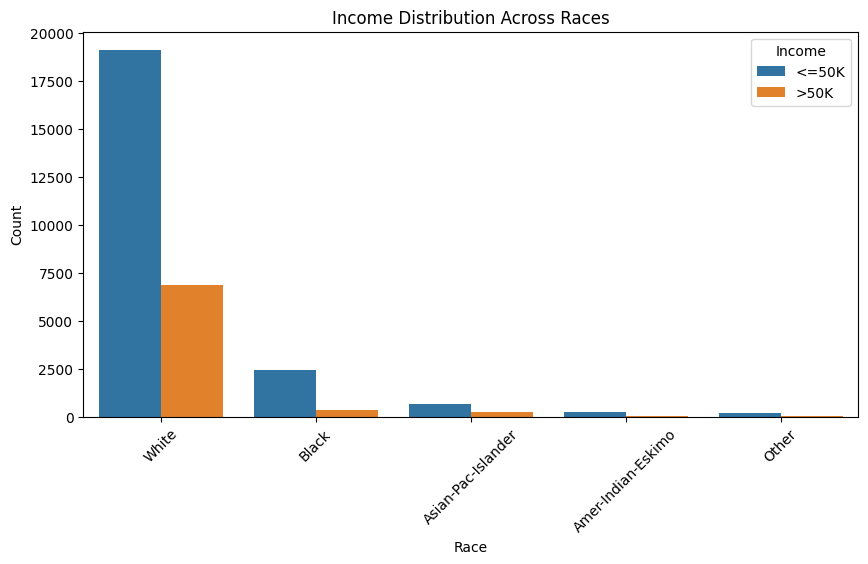

In [ ]:
# Distribution of Income Across Different Races
plt.figure(figsize=(10, 5))
sns.countplot(x='race', hue='income', data=data)
plt.title('Income Distribution Across Races')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

Interpretation: The plot reveals disparities in income across races, with some races having a higher proportion of individuals earning over $50,000. This information can guide UVW College in developing targeted marketing initiatives that address and engage underrepresented racial groups or highlight diversity in their programs.

###Visualization 3: Age and Education Level vs. Income
User Story: As a data analyst, I am investigating how age combined with years of education impacts income levels to help the marketing team develop profiles for potential students.

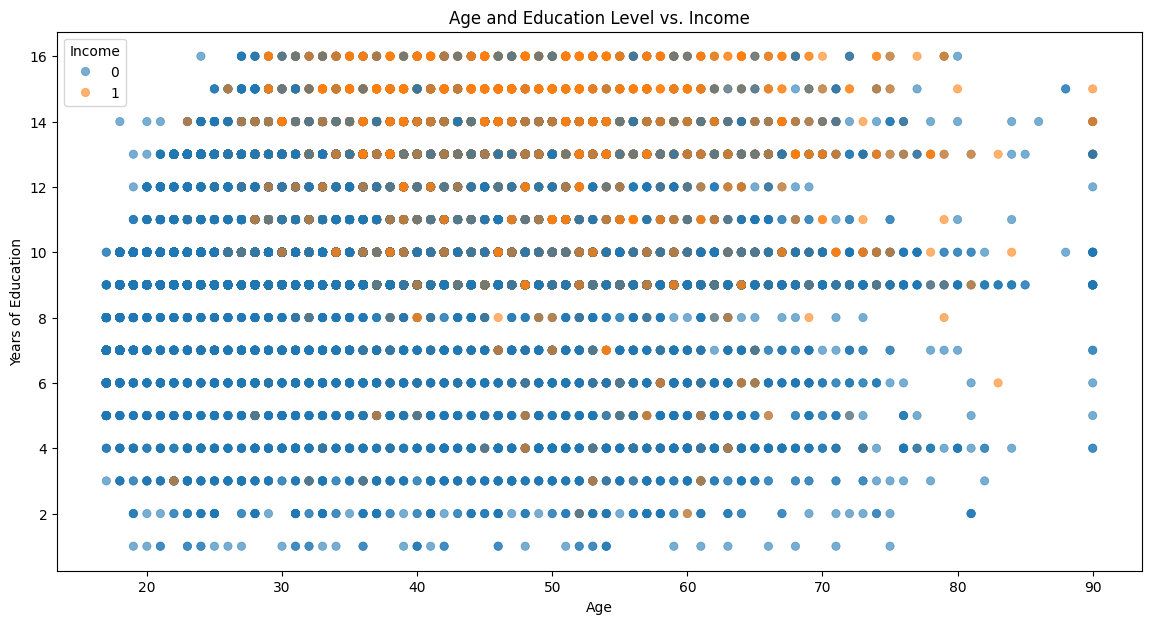

In [ ]:
# Age and Education vs. Income
plt.figure(figsize=(14, 7))
sns.scatterplot(x='age', y='education-num', hue='income', data=data, alpha=0.6, edgecolor=None)
plt.title('Age and Education Level vs. Income')
plt.xlabel('Age')
plt.ylabel('Years of Education')
plt.legend(title='Income')
plt.show()

Interpretation: The scatterplot shows a positive correlation between age, education, and income, suggesting that older individuals with more years of education tend to have higher incomes. This can influence marketing materials to focus on mid-career professionals who might consider further education to boost their career prospects.


###Visualization 4: Impact of Occupation and Education on Income
User Story: The marketing team wants insights into how occupation and educational attainment interact to affect income, which will help in designing specialized campaigns for different professional sectors.

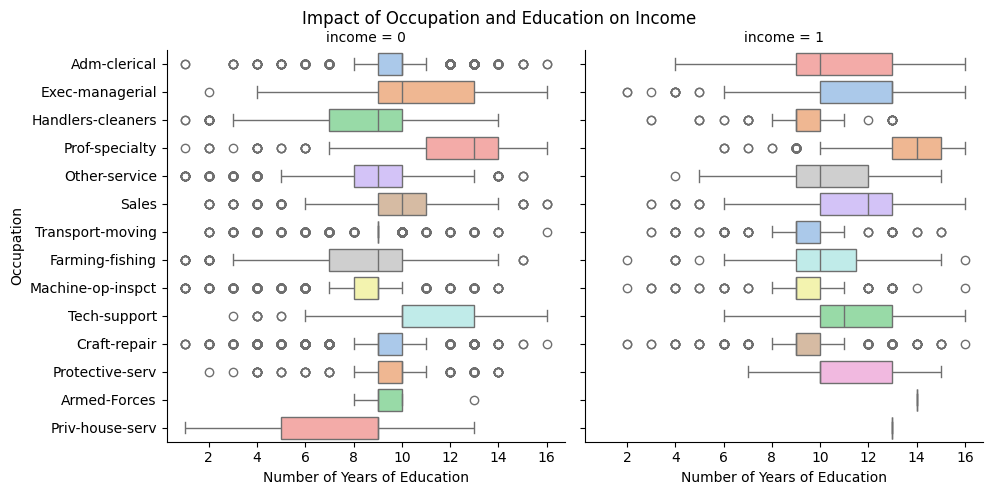

In [ ]:
# Multivariate analysis of occupation, education-num vs income
g = sns.FacetGrid(data, col='income', height=5, aspect=1)
g.map_dataframe(sns.boxplot, x='education-num', y='occupation', orient='h', hue='occupation', palette='pastel', legend=False)
g.set_axis_labels('Number of Years of Education', 'Occupation')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Impact of Occupation and Education on Income')
plt.show()

Interpretation: The facet grid indicates that certain occupations paired with higher education levels consistently yield higher incomes. This finding could lead UVW College to customize their outreach and program offerings to appeal specifically to professionals in fields where further education most directly correlates with income increases.

###Visualization 5: 3D Scatter Plot of Age, Capital Gain, and Income
User Story: As part of our analysis for UVW College, I am tasked with understanding how age and capital gains interact to influence income levels, assisting in targeting potential students who might benefit from financial planning or investment-related courses.

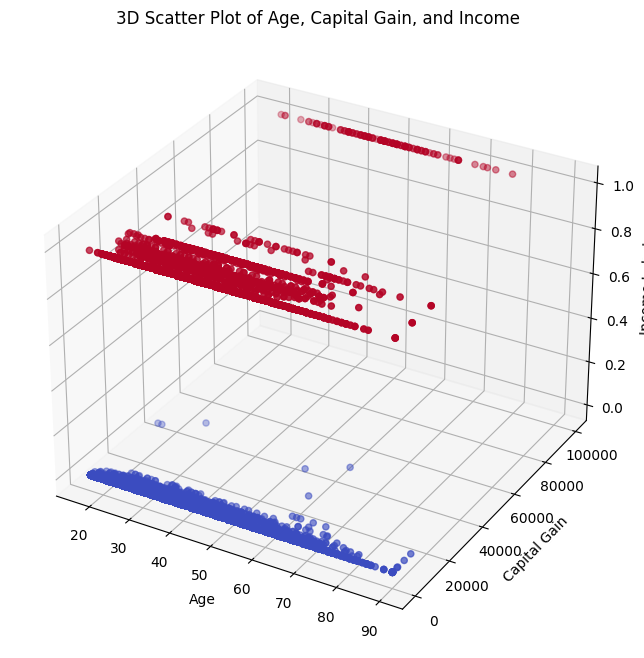

In [ ]:
# Age, Capital Gain, and Income
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['age'], data['capital-gain'], data['income'], c=data['income'], cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('Capital Gain')
ax.set_zlabel('Income Label')
plt.title('3D Scatter Plot of Age, Capital Gain, and Income')
plt.show()

Interpretation: The 3D scatter plot highlights the relationship between age, capital gains, and income, showing that higher capital gains and advanced age often lead to higher income categories. This insight suggests a market segment of older individuals with some wealth accumulation who might be interested in courses that can further enhance their financial stability or growth.

###Visualization 6: Marital Status and Gender vs. Income
User Story: As a UVW College enrollment officer, I want to understand the influence of marital status and gender on income to identify demographic segments that may have different educational needs and financial capabilities.

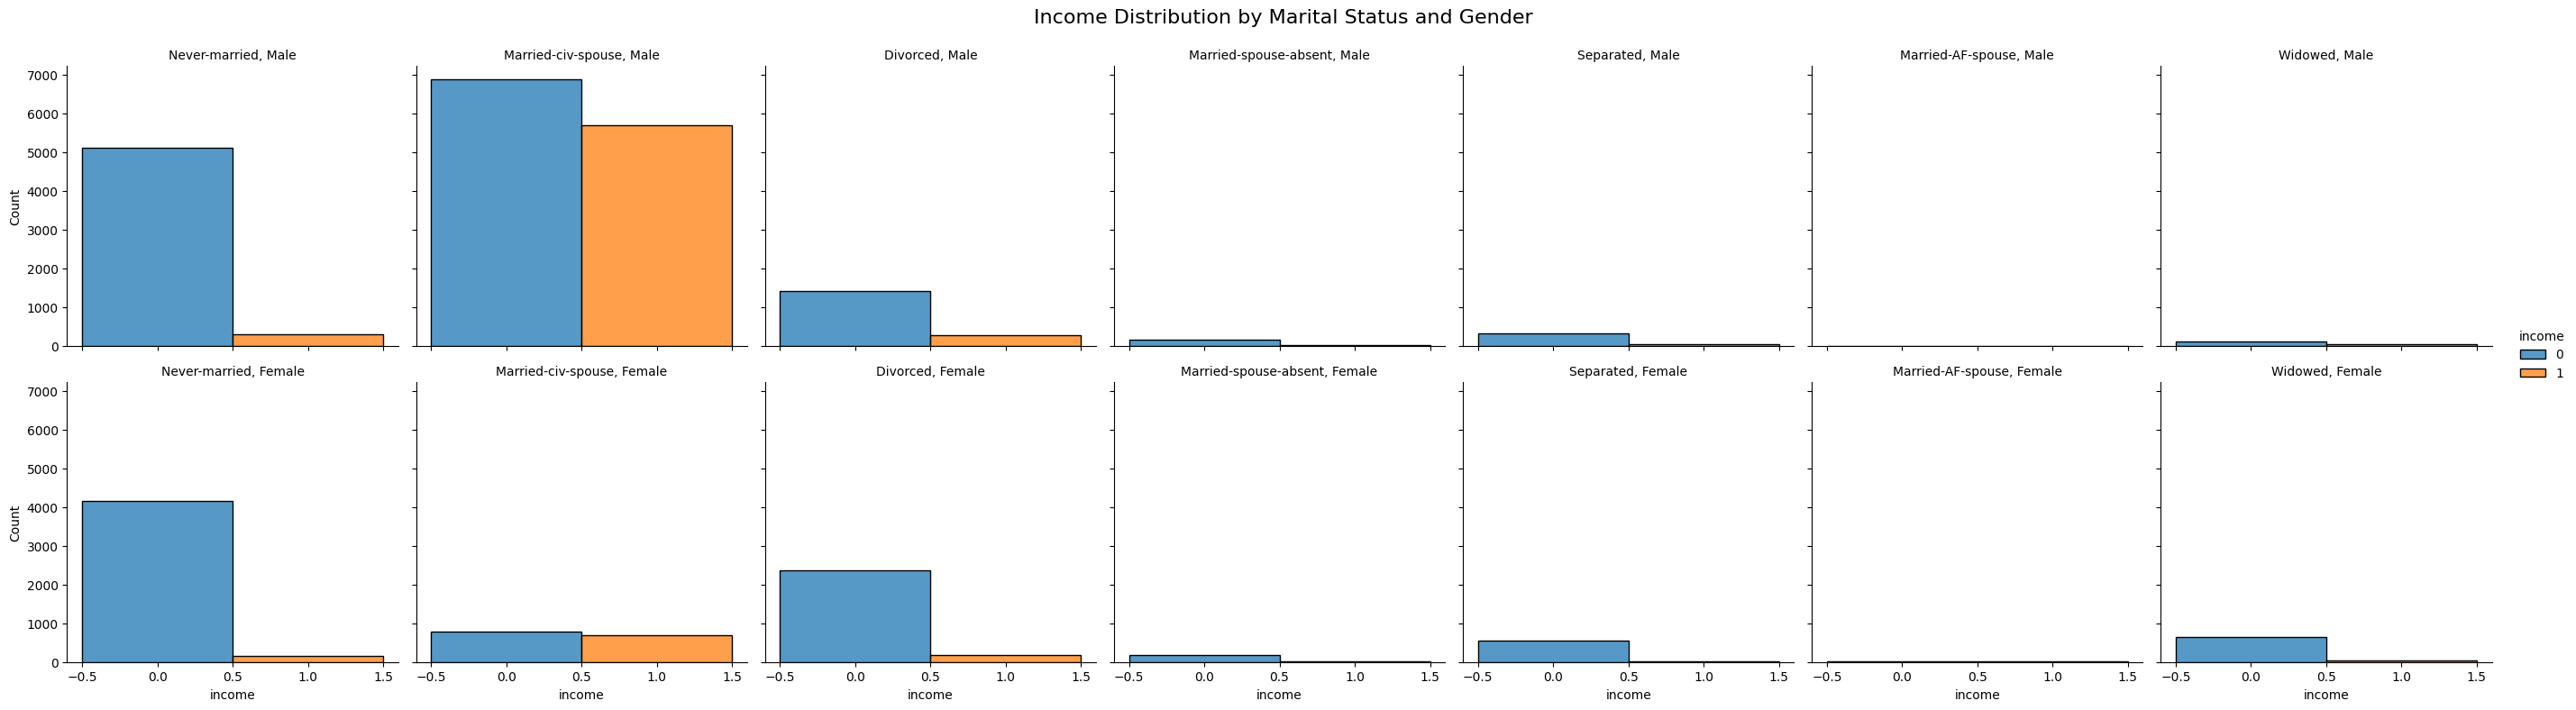

In [ ]:
# Marital Status and Gender vs. Income
g = sns.FacetGrid(data, col='marital-status', row='sex', hue='income', height=4, aspect=1)
g.map_dataframe(sns.histplot, 'income')
g.add_legend()
g.set_titles("{col_name}, {row_name}")
g.fig.suptitle('Income Distribution by Marital Status and Gender', fontsize=16)
g.fig.subplots_adjust(top=0.9)

Interpretation: The visualization indicates that marital status and gender both influence income levels. Never-married individuals, regardless of gender, mostly appear in the lower-income category, while married individuals tend to fall in the higher-income category. This suggests targeted educational programs could be marketed differently to these groups, with a focus on career advancement for married individuals and career initiation or change for those who are never married.